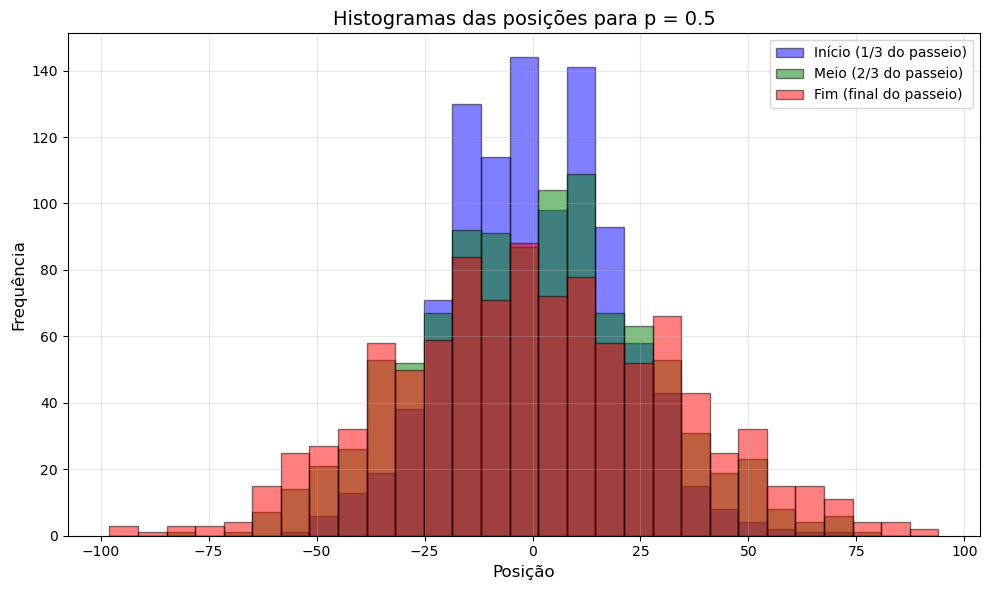

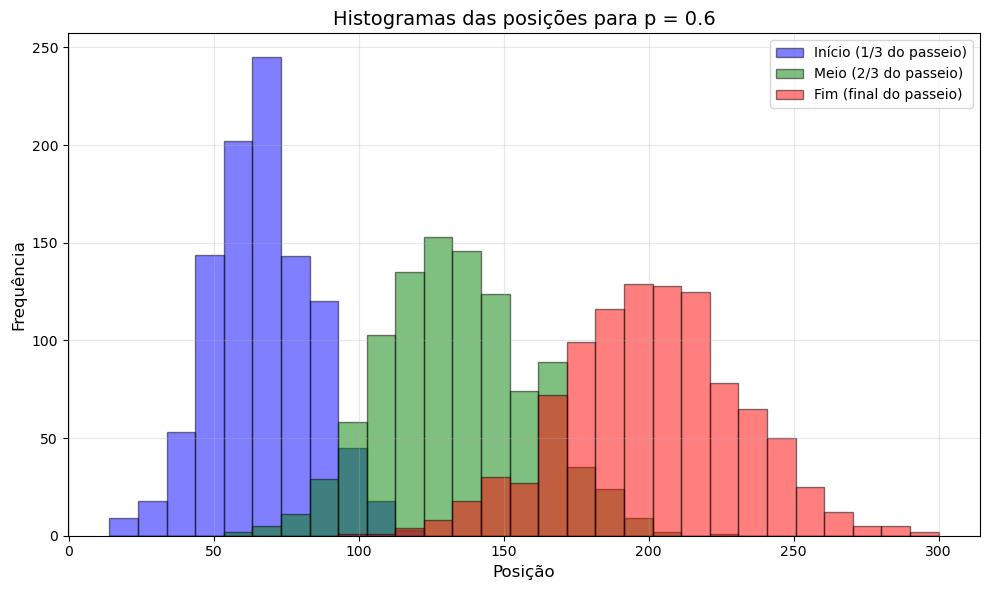

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

class PasseioAleatorio:
    def __init__(self, p, N):
        """
        Parâmetros:
        p (float): Probabilidade de movimento para a direita
        N (int): Número de passos no passeio
        """
        self.p = p
        self.N = N
    
    def funcao_passeio(self):
        """
        Gera um passeio aleatório usando rng.choice() e np.cumsum()
        
        Retorna:
        array: Posições do passeio aleatório
        """
        rng = np.random.default_rng()
        passos = rng.choice([1, -1], size=self.N, p=[self.p, 1-self.p])
        
        x = np.concatenate(([0], np.cumsum(passos)))
        
        return x


def extrair_momentos_1(posicoes):
    n = len(posicoes)
    inicio = posicoes[:n//3]
    meio   = posicoes[n//3:2*n//3]
    fim    = posicoes[2*n//3:]
    return inicio, meio, fim


num_simulacoes = 1000
num_passos = 1000


# Para p = 0.5
todas_posicoes_p05 = []
for j in range(num_simulacoes):
    passeio = PasseioAleatorio(0.5, num_passos)
    todas_posicoes_p05.append(passeio.funcao_passeio())
    
# Para p = 0.6
todas_posicoes_p06 = []
for k in range(num_simulacoes):
    passeio = PasseioAleatorio(0.6, num_passos)
    todas_posicoes_p06.append(passeio.funcao_passeio())

#extraindo os momentos de cada caminhada e coletar as posições correspondentes

# Para p = 0.5
posicoes_inicio_p05 = []
posicoes_meio_p05 = []
posicoes_fim_p05 = []

for caminho in todas_posicoes_p05:
    inicio, meio, fim = extrair_momentos_1(caminho)
    posicoes_inicio_p05.append(inicio[-1])  # Última posição do primeiro terço
    posicoes_meio_p05.append(meio[-1])      # Última posição do segundo terço
    posicoes_fim_p05.append(fim[-1])        # Última posição (final da caminhada)

# Para p = 0.6
posicoes_inicio_p06 = []
posicoes_meio_p06 = []
posicoes_fim_p06 = []

for caminho in todas_posicoes_p06:
    inicio, meio, fim = extrair_momentos_1(caminho)
    posicoes_inicio_p06.append(inicio[-1])
    posicoes_meio_p06.append(meio[-1])
    posicoes_fim_p06.append(fim[-1])

# Plotando os histogramas para p = 0.5 (todos juntos)
plt.figure(figsize=(10, 6))
plt.title('Histogramas das posições para p = 0.5', fontsize=14)

# Calculando o range mais amplo para os bins
min_val = min(min(posicoes_inicio_p05), min(posicoes_meio_p05), min(posicoes_fim_p05))
max_val = max(max(posicoes_inicio_p05), max(posicoes_meio_p05), max(posicoes_fim_p05))
bins = np.linspace(min_val, max_val, 30)

# Histogramas sobrepostos para p = 0.5
plt.hist(posicoes_inicio_p05, bins=bins, alpha=0.5, color='blue', edgecolor='black', label='Início (1/3 do passeio)')
plt.hist(posicoes_meio_p05, bins=bins, alpha=0.5, color='green', edgecolor='black', label='Meio (2/3 do passeio)')
plt.hist(posicoes_fim_p05, bins=bins, alpha=0.5, color='red', edgecolor='black', label='Fim (final do passeio)')

plt.xlabel('Posição', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Plotando os histogramas para p = 0.6 (todos juntos)
plt.figure(figsize=(10, 6))
plt.title('Histogramas das posições para p = 0.6', fontsize=14)

# Calculando o range mais amplo para os bins
min_val = min(min(posicoes_inicio_p06), min(posicoes_meio_p06), min(posicoes_fim_p06))
max_val = max(max(posicoes_inicio_p06), max(posicoes_meio_p06), max(posicoes_fim_p06))
bins = np.linspace(min_val, max_val, 30)

# Histogramas sobrepostos para p = 0.6
plt.hist(posicoes_inicio_p06, bins=bins, alpha=0.5, color='blue', edgecolor='black', label='Início (1/3 do passeio)')
plt.hist(posicoes_meio_p06, bins=bins, alpha=0.5, color='green', edgecolor='black', label='Meio (2/3 do passeio)')
plt.hist(posicoes_fim_p06, bins=bins, alpha=0.5, color='red', edgecolor='black', label='Fim (final do passeio)')

plt.xlabel('Posição', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()
